In [17]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import datasets
from IPython.display import display, HTML

## Creación de la nueva variable 
mpg01=
0 = Todos los valores que son menores al tercer cuartil 
1 = Todos los valores que son mayores al tercer cuartil


In [18]:
auto_df = pd.read_csv('Auto.csv')

# Remove missing values
auto_df = auto_df.drop(auto_df[auto_df.values == '?'].index)
auto_df = auto_df.reset_index()

# Convert quantitive datatypes to numerics
datatypes = {'quant': ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin'],
             'qual': ['name']}

quants = auto_df[datatypes['quant']].astype(np.float_)
auto_df = pd.concat([quants, auto_df[datatypes['qual']]], axis=1) 

# Add mpg01 feature
mpg01   = (auto_df['mpg'] > (auto_df['mpg'].median())*0.75).astype(np.float64)
auto_df = pd.concat([auto_df, mpg01.rename('mpg01')], axis=1).drop('mpg', axis=1)
auto_df.head()

display(auto_df.head())

,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,1.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,0.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,1.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,0.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,0.0


In [24]:
# Clarifying orientation of confusion matrix
# Here we see that 
# - rows i represent true values
# - columns j represent predictions


y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]

confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 3]], dtype=int64)

In [25]:
def confusion_table(confusion_mtx):
    """Renders a nice confusion table with labels"""
    confusion_df = pd.DataFrame({'y_pred=0': np.append(confusion_mtx[:, 0], confusion_mtx.sum(axis=0)[0]),
                                 'y_pred=1': np.append(confusion_mtx[:, 1], confusion_mtx.sum(axis=0)[1]),
                                 'Total': np.append(confusion_mtx.sum(axis=1), ''),
                                 '': ['y=0', 'y=1', 'Total']}).set_index('')
    return confusion_df


def positive_observations(y):
    # What percentage of observations are positive?
    proportion_1 = ((y == 1).sum() / len(y))
    pct_1        = np.around(proportion_1*100, decimals=3)
    display(HTML('<p><h4>{}%</h4>of observations are positive</p>'.format(pct_1)))


# Classifier stats
# -------------------------------------------------

def prior_error_rate(confusion_matrix):
    """The prior probability that a result is positive"""
    return 1 - (np.sum(confusion_mtx[1, :]) / np.sum(confusion_mtx))

def total_error_rate(confusion_matrix):
    """Derive total error rate from confusion matrix"""
    return 1 - np.trace(confusion_mtx) / np.sum(confusion_mtx)

def true_positive_rate(confusion_mtx):
    """or sensitivity: the proportion of actual POSITIVES that are correctly identified as such"""
    return confusion_mtx[1, 1] / np.sum(confusion_mtx[1, :])

def false_negative_rate(confusion_mtx):
    """the proportion of actual POSITIVES that are incorrectly identified as negative"""
    return confusion_mtx[1, 0] / np.sum(confusion_mtx[1, :])

def false_positive_rate(confusion_mtx):
    """the proportion of actual NEGATIVES that are incorrectly identified as positives"""
    return confusion_mtx[0, 1] / np.sum(confusion_mtx[0, :])

def true_negative_rate(confusion_mtx):
    """or specificity: the proportion of actual NEGATIVES that are correctly identified as such"""
    return confusion_mtx[0, 0] / np.sum(confusion_mtx[0, :])

def positive_predictive_value(confusion_mtx):
    """or precision: the proportion of predicted positives that are correctly predicted"""
    return confusion_mtx[1, 1] / np.sum(confusion_mtx[:, 1])

def negative_predictive_value(confusion_mtx):
    """the proportion of predicted negatives that are correctly predicted"""
    return confusion_mtx[0, 0] / np.sum(confusion_mtx[:, 0])

def classifier_stats(confusion_mtx):
    return pd.Series({'prior_error_rate': prior_error_rate(confusion_mtx),
                      'total_error_rate': total_error_rate(confusion_mtx),
                      'true_positive_rate (sensitivity)': true_positive_rate(confusion_mtx),
                      'false_negative_rate': false_negative_rate(confusion_mtx),
                      'false_positive_rate': false_positive_rate(confusion_mtx),
                      'true_negative_rate (specificity)': true_negative_rate(confusion_mtx),
                      'positive_predictive_value (precision)': positive_predictive_value(confusion_mtx),
                      'negative_predictive_value': negative_predictive_value(confusion_mtx)})


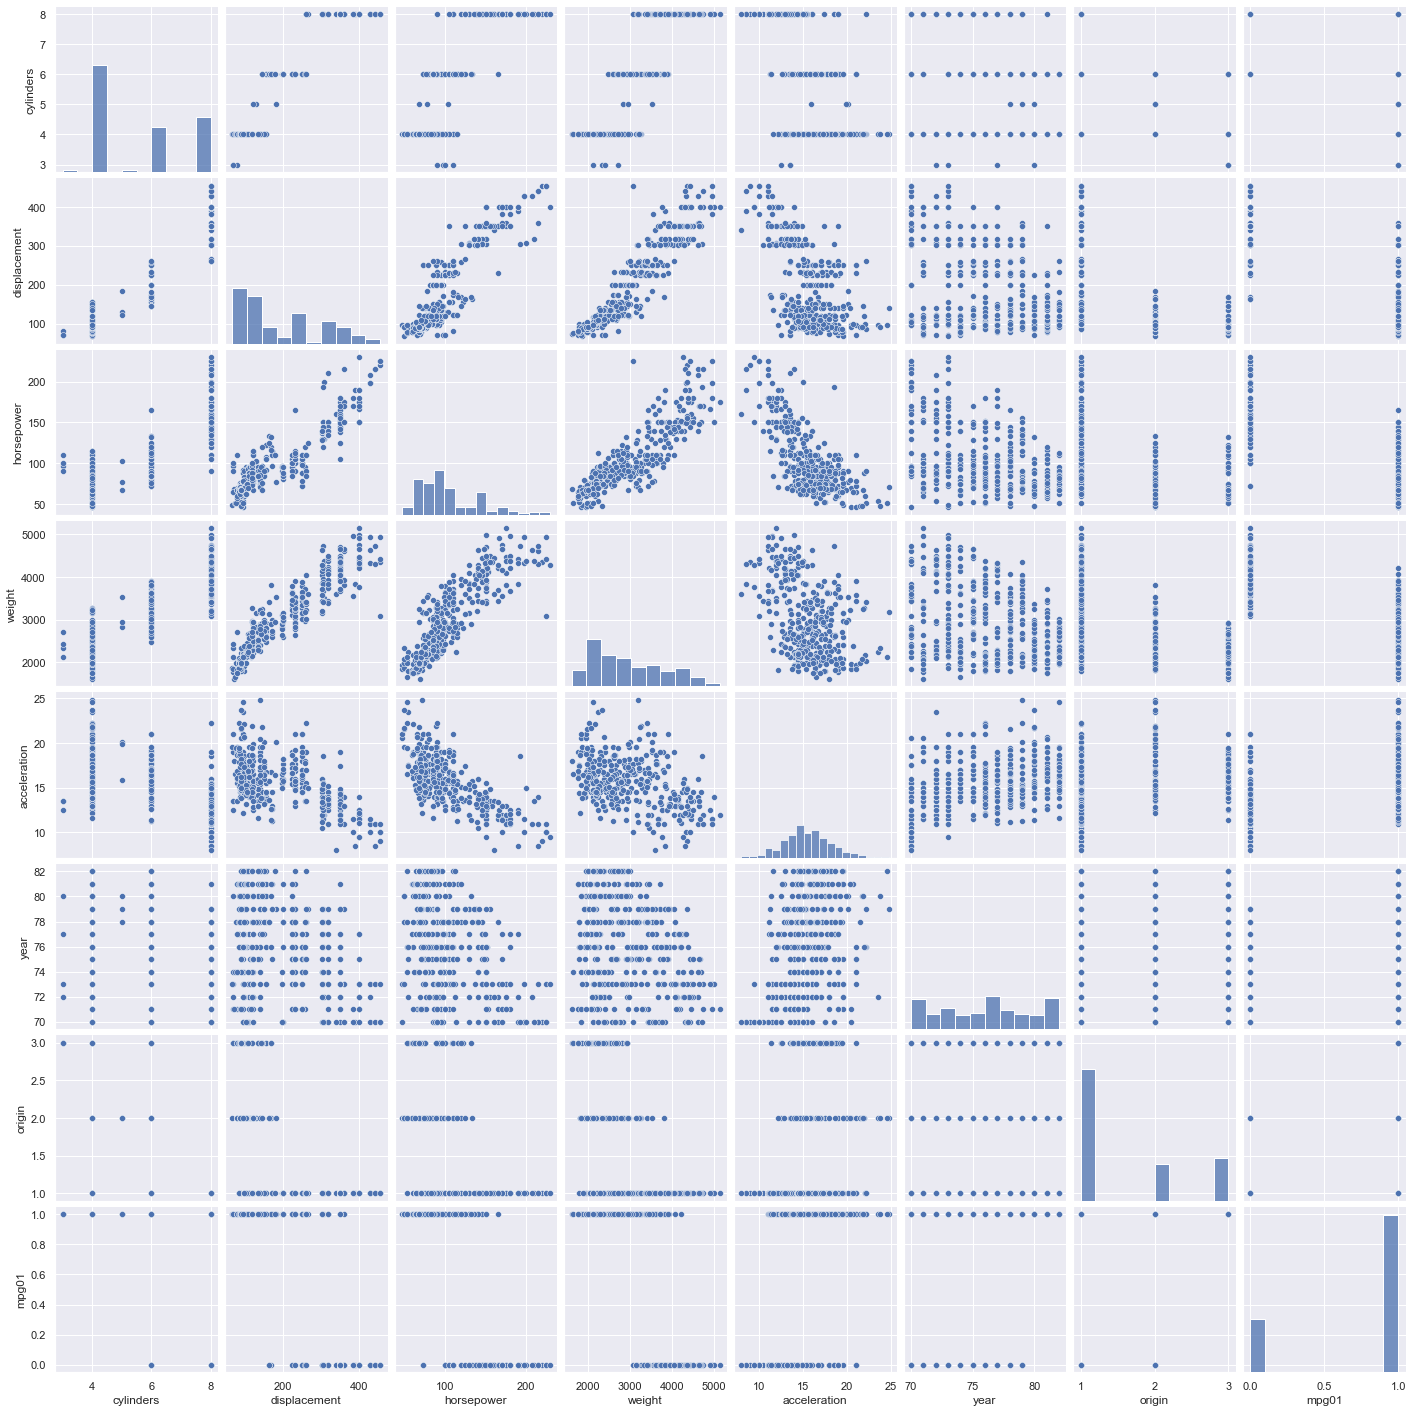

In [26]:
sns.pairplot(auto_df);

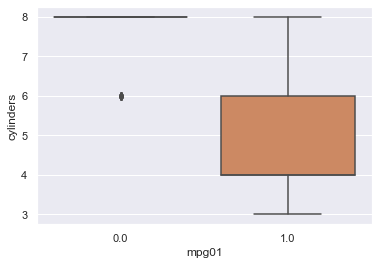

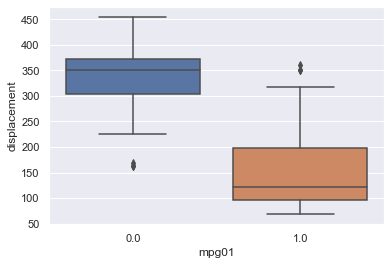

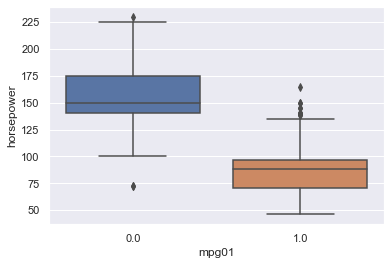

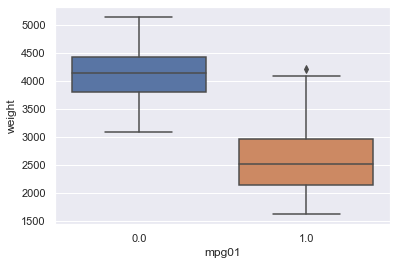

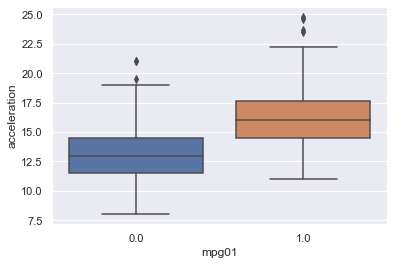

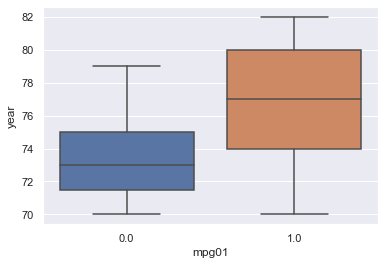

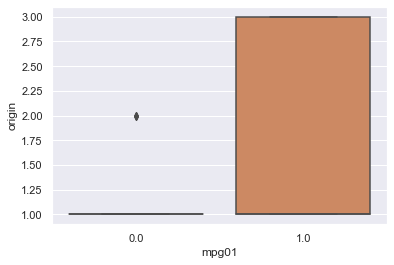

In [27]:
for c in auto_df.columns.drop(['mpg01', 'name']):
    sns.boxplot(x=auto_df['mpg01'], y=auto_df[c])
    plt.show();

In [28]:
# Create index for training set
np.random.seed(1)
train = np.random.rand(len(auto_df)) < 0.7

# Training set (70%)
display(HTML('<h3>Training set</h3>'))
display(auto_df[train].head())

# Test set (30%)
display(HTML('<h3>Test set</h3>'))
display(auto_df[~train].head())


,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,1.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,1.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,0.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,0.0
5,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500,0.0


,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,0.0
13,8.0,455.0,225.0,3086.0,10.0,70.0,1.0,buick estate wagon (sw),0.0
20,4.0,110.0,87.0,2672.0,17.5,70.0,2.0,peugeot 504,1.0
21,4.0,107.0,90.0,2430.0,14.5,70.0,2.0,audi 100 ls,1.0
24,6.0,199.0,90.0,2648.0,15.0,70.0,1.0,amc gremlin,1.0


In [29]:
# Create index for training set
np.random.seed(1)
train_idx = np.random.rand(len(auto_df)) < 0.7
auto_df_train = auto_df[train_idx]
auto_df_test  = auto_df[~train_idx]

In [30]:
# Create index for holdout set
np.random.seed(1)
train = np.random.rand(len(auto_df)) < 0.7

predictors  = ['weight', 'cylinders', 'year', 'acceleration']
#predictors  = auto_df.columns.drop(['mpg01', 'name'])
X_train = np.array(auto_df[train][predictors])
y_train = np.array(auto_df[train]['mpg01'])
X_test  = np.array(auto_df[~train][predictors])
y_test  = np.array(auto_df[~train]['mpg01'])

# MODELS
# Logistic Regression
#model_logit = sm.Logit(y_train, X_train).fit() <--- this technique didn't converge
logit       = LogisticRegression()
model_logit = logit.fit(X_train, y_train)
# LDA
lda         = LinearDiscriminantAnalysis()
model_lda   = lda.fit(X_train, y_train)
# QDA
qda         = QuadraticDiscriminantAnalysis()
model_qda   = qda.fit(X_train, y_train)


models = {'logit': model_logit, 
          'lda': model_lda, 
          'qda': model_qda}
scaled = []


# PREDICT
for k in models:
    # Predict
    if k in scaled:
        y_pred = models[k].predict(preprocessing.scale(X_test))
    else:
        y_pred = models[k].predict(X_test)
    # Confusion table
    display(HTML('<h3>{}</h3>'.format(k)))
    confusion_mtx = confusion_matrix(y_test, y_pred)
    display(confusion_table(confusion_mtx))
    # Classifier stats
    display(classifier_stats(confusion_mtx))



,y_pred=0,y_pred=1,Total
,,,
y=0,29,1,30
y=1,1,89,90
Total,30,90,


prior_error_rate                         0.250000
total_error_rate                         0.016667
true_positive_rate (sensitivity)         0.988889
false_negative_rate                      0.011111
false_positive_rate                      0.033333
true_negative_rate (specificity)         0.966667
positive_predictive_value (precision)    0.988889
negative_predictive_value                0.966667
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,26,4,30
y=1,7,83,90
Total,33,87,


prior_error_rate                         0.250000
total_error_rate                         0.091667
true_positive_rate (sensitivity)         0.922222
false_negative_rate                      0.077778
false_positive_rate                      0.133333
true_negative_rate (specificity)         0.866667
positive_predictive_value (precision)    0.954023
negative_predictive_value                0.787879
dtype: float64

,y_pred=0,y_pred=1,Total
,,,
y=0,27,3,30
y=1,6,84,90
Total,33,87,


prior_error_rate                         0.250000
total_error_rate                         0.075000
true_positive_rate (sensitivity)         0.933333
false_negative_rate                      0.066667
false_positive_rate                      0.100000
true_negative_rate (specificity)         0.900000
positive_predictive_value (precision)    0.965517
negative_predictive_value                0.818182
dtype: float64

In [37]:
from sklearn.neighbors import KNeighborsClassifier


In [38]:
# Create index for holdout set

np.random.seed(1)
train = np.random.rand(len(auto_df)) < 0.7

predictors  = ['weight', 'cylinders', 'year', 'acceleration']
#predictors  = auto_df.columns.drop(['mpg01', 'name'])
X_train = np.array(auto_df[train][predictors])
y_train = np.array(auto_df[train]['mpg01'])
X_test  = np.array(auto_df[~train][predictors])
y_test  = np.array(auto_df[~train]['mpg01'])



# PREDICT
for K in range(1, 21):
    # model
    model = KNeighborsClassifier(n_neighbors=K).fit(preprocessing.scale(X_train), y_train)
    # Predict
    y_pred = model.predict(preprocessing.scale(X_test))
    
    # Confusion table
    display(HTML('<h3>K={}</h3>'.format(K)))
    confusion_mtx = confusion_matrix(y_test, y_pred)
    display(confusion_table(confusion_mtx))
    
    # Classifier stats
    print('total_error_rate: \n' + str(classifier_stats(confusion_mtx)['total_error_rate']))

,y_pred=0,y_pred=1,Total
,,,
y=0,24,6,30
y=1,4,86,90
Total,28,92,


total_error_rate: 
0.08333333333333337


,y_pred=0,y_pred=1,Total
,,,
y=0,28,2,30
y=1,7,83,90
Total,35,85,


total_error_rate: 
0.07499999999999996


,y_pred=0,y_pred=1,Total
,,,
y=0,26,4,30
y=1,3,87,90
Total,29,91,


total_error_rate: 
0.05833333333333335


,y_pred=0,y_pred=1,Total
,,,
y=0,28,2,30
y=1,5,85,90
Total,33,87,


total_error_rate: 
0.05833333333333335


,y_pred=0,y_pred=1,Total
,,,
y=0,27,3,30
y=1,2,88,90
Total,29,91,


total_error_rate: 
0.04166666666666663


,y_pred=0,y_pred=1,Total
,,,
y=0,28,2,30
y=1,2,88,90
Total,30,90,


total_error_rate: 
0.033333333333333326


,y_pred=0,y_pred=1,Total
,,,
y=0,26,4,30
y=1,2,88,90
Total,28,92,


total_error_rate: 
0.050000000000000044


,y_pred=0,y_pred=1,Total
,,,
y=0,28,2,30
y=1,2,88,90
Total,30,90,


total_error_rate: 
0.033333333333333326


,y_pred=0,y_pred=1,Total
,,,
y=0,26,4,30
y=1,2,88,90
Total,28,92,


total_error_rate: 
0.050000000000000044


,y_pred=0,y_pred=1,Total
,,,
y=0,26,4,30
y=1,3,87,90
Total,29,91,


total_error_rate: 
0.05833333333333335


,y_pred=0,y_pred=1,Total
,,,
y=0,26,4,30
y=1,3,87,90
Total,29,91,


total_error_rate: 
0.05833333333333335


,y_pred=0,y_pred=1,Total
,,,
y=0,27,3,30
y=1,5,85,90
Total,32,88,


total_error_rate: 
0.06666666666666665


,y_pred=0,y_pred=1,Total
,,,
y=0,26,4,30
y=1,3,87,90
Total,29,91,


total_error_rate: 
0.05833333333333335


,y_pred=0,y_pred=1,Total
,,,
y=0,26,4,30
y=1,6,84,90
Total,32,88,


total_error_rate: 
0.08333333333333337


,y_pred=0,y_pred=1,Total
,,,
y=0,26,4,30
y=1,4,86,90
Total,30,90,


total_error_rate: 
0.06666666666666665


,y_pred=0,y_pred=1,Total
,,,
y=0,26,4,30
y=1,6,84,90
Total,32,88,


total_error_rate: 
0.08333333333333337


,y_pred=0,y_pred=1,Total
,,,
y=0,26,4,30
y=1,6,84,90
Total,32,88,


total_error_rate: 
0.08333333333333337


,y_pred=0,y_pred=1,Total
,,,
y=0,26,4,30
y=1,6,84,90
Total,32,88,


total_error_rate: 
0.08333333333333337


,y_pred=0,y_pred=1,Total
,,,
y=0,26,4,30
y=1,5,85,90
Total,31,89,


total_error_rate: 
0.07499999999999996


,y_pred=0,y_pred=1,Total
,,,
y=0,26,4,30
y=1,6,84,90
Total,32,88,


total_error_rate: 
0.08333333333333337


In [32]:
def Power(x, a):
    return np.power(x, a)

In [33]:
display(HTML('<p>10^3 = {}</p>'.format(Power(10, 3))))
display(HTML('<p>10^3 = {}</p>'.format(Power(8, 17))))
display(HTML('<p>10^3 = {}</p>'.format(Power(131, 3))))

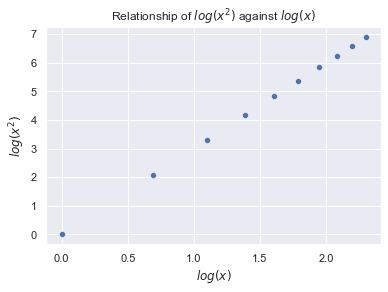

In [34]:
x = np.arange(1, 11)
y = Power(x, 3)

ax = sns.scatterplot(x=np.log(x), y=np.log(y))
plt.xlabel('$log(x)$')
plt.ylabel('$log(x^2)$')
plt.title('Relationship of $log(x^2)$ against $log(x)$')
plt.show();

In [35]:
def PlotPower(start, stop, power):
    x = np.arange(start, stop+1)
    y = np.power(x, power)
    
    ax = sns.scatterplot(x=x, y=y)
    plt.xlabel('$x$')
    plt.ylabel('$x^{}$'.format(power))
    plt.title('Relationship of $x^{}$ against $x$'.format(power))
    plt.show();
    

def PlotPowerLogs(start, stop, power):
    x = np.arange(start, stop+1)
    y = np.power(x, power)
    
    ax = sns.scatterplot(x=np.log(x), y=np.log(y))
    plt.xlabel('$log(x)$')
    plt.ylabel('$log(x^{})$'.format(power))
    plt.title('Relationship of $log(x^{})$ against $log(x)$'.format(power))
    plt.show();

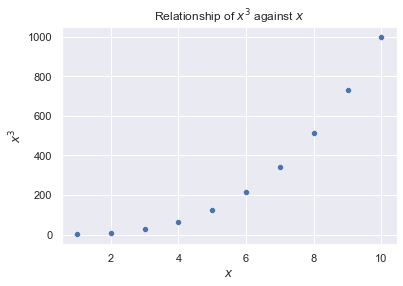

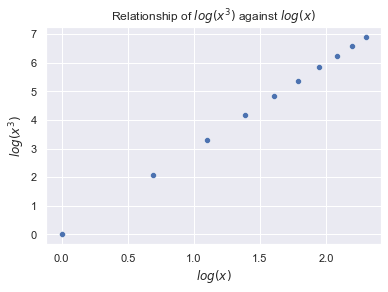

In [36]:
PlotPower(1, 10, 3)
PlotPowerLogs(1, 10, 3)

CONCLUSIONES
1. QDA
2. K6
3. K8
4. LDA

En términos de precisión general del modelo QDA arroja alta sensibilidad (0.93), precisión (0.96), un valor predictivo negativo (0.81), uno razonablemente alto, por lo tanto, se considera el mejor modelo teniendo en cuenta y basándose en las métricas mencionadas. El modelo que le sigue, en términos del error total sería K6 y K8, puesto que estos tienen un error de 0.03333, lo que los hacen los modelos con menor error de todos los K. Y finalmente, tenemos en el top 4 LDA, este tiene la tasa de error total más alta de los modelos considerados (0.091), y en comparación con QDA las demás métricas evaluadas presentan un valor menor.

